# Beispiele

In [1]:
# Import
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

## Beispiel: SVM from Scratch: Loss Function

<div>
    <img src=attachment:e80571fc-03da-4770-8246-a47e01f41c60.png width=200>
</div>

Wir haben gesehen, dass man durch ein paar mathematische Umformungen zu einem übersichtlichen Optimierungsproblem bzw. einer relativ überschaubaren Kostenfunktion gelangt. Wir wollen uns nun in diesem Beispiel damit beschäftigen die Loss Function in

$$ \min_{\mathbf{w},b} \frac{1}{2}||\mathbf{w}||^2 + C\sum_i \max\{0, 1 - y_i(\langle\mathbf{w}, \mathbf{x}_i\rangle + b)\}$$

als Funktion in Python abzubilden.
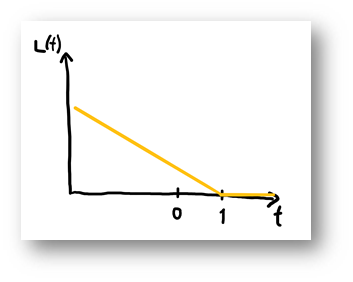

In [2]:
# Data and parameters
X, y = make_blobs()
w = np.random.rand(X.shape[1])
b = np.random.rand()

In [ ]:
def svm_loss_function(
    

## SVM zur Handschrifterkennung

<div>
    <img src=attachment:c92fe058-bc7b-42f3-8ca7-40a2f2f4422d.png width=350>
</div>

Stellen Sie sich vor Sie müssten einem Modell aus handschriftlichen Notizen beibringen geschriebene Zahlen zu erkennen. Dieser Use Case kann Ihnen an vielen Stellen begegnen - z.B.
* wenn Sie als Post von Briefen die geschriebene Postleitzahl und Hausnummer digitalisieren müssten und so die Weiterverarbeitung von Briefen beschleunigen würden
* wenn in hochautomatisierten Produktionsanlagen in Bauteilen eingestanzte Seriennummern erkannt und digitalisiert werden müssen
* wenn Sie im Rahmen einer Absatzprognose Notizen von Mitarbeitern erhalten, auf denen noch Absatzzahlen handschriftlich festgehalten werden.

In diesem Beispiel wollen wir eine SVM nutzen, um genau diesen Use Case zu lösen. Hierzu nutzen wir das sog. _Digits-Dataset_ aus `sklearn`, in dem eine Vielzahl handschriftlicher Zahlen in `(8, 8)` großen Arrays abgespeichert sind. Unser Ziel ist es, dass die SVM so trainiert wird, dass sie __ungesehene__ handschriftliche Zahlen in die richtige Klasse (die zugrundeliegende Zahl) einordnen kann. Bemerkung: wir kommen hier mit einer _Multi-Class SVM_ in Berührung.
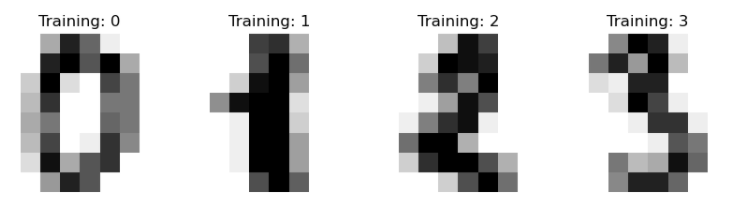

In [2]:
# Import
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Get digits data

# Look at data

# Plot some digits


In [3]:
# Do train test split

# Look at split sizes

# Get SVM instance

# Train SVM

# Predict test data

# Visualize prediction


## SVM and Face Recognition
<div>
    <img src=attachment:28a0f4ea-9a28-44a6-b47c-9fae015f25b8.png width=350>
</div>

Wir wollen uns in diesem Beispiel gleich einem interessanten Anwendungsfall im maschinellen Lernen widmen: der Gesichtserkennung. Hierzu laden wir uns mittels eines sog. _Fetchers_ aus `sklearn.datasets` einen Datensatz, der Bilder von Gesichtern berühmter Personen beinhaltet. Unser Ziel ist es eine SVM zu trainieren, die diese Gesichter erkennen - also __klassifizieren__ - kann. Zu jeder Person gibt es eine Vielzahl verschiedener Aufnahmen - jede Person stellt also eine __Klasse__ dar. Die Bilder haben die Dimensionalität `(62,47)` und somit ca. 3000 Pixel. Wenn jeder Pixel einer Dimension in einem Raum entsprechen würde, dann wäre ein Gesicht ein Datenpunkt in diesem Raum. Dieser Raum ist uns zu hochdimensional. Daher _projizieren_ wir die Gesichter in einen niedrigdimensionaleren Raum (wir greifen hier den Themenblock PCA vorweg).
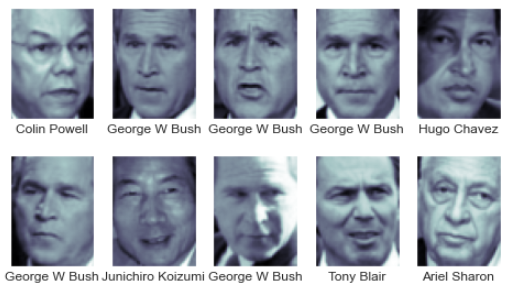

In [ ]:
# Import
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import seaborn as sns; sns.set()

# Get face images

# Look at the structure


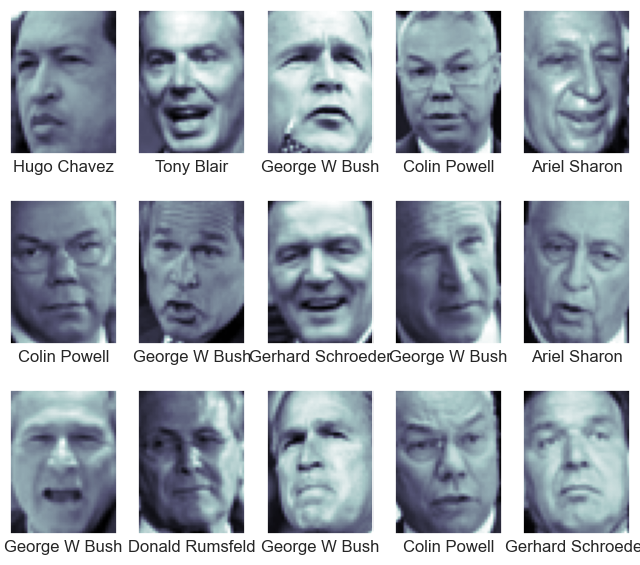

In [40]:
# Let's have a look


In [41]:
# Download the data, if not already on disk and load it as numpy arrays

# split into a training and testing set

# Compute a PCA on the face dataset


In [1]:
# Train a SVM classification model


In [2]:
# Quantitative evaluation of the model quality on the test set

# Qualitative evaluation of the predictions using matplotlib

# plot the result of the prediction on a portion of the test set


## Beispiel: Fault Classification of Bearing Faults

<div>
    <img src=attachment:16768a86-e1c2-4a06-bb6c-889a8c0b1997.png width=200>
</div>
(Bildquelle: Wikipedia)

In diesem Beispiel wollen wir uns dem Apsekt der _Fault Classification_ annehmen. Hierzu nutzen wir Vibrationsdaten von Kugellagern, die verschiedene Schadensklassen aufweisen. Diese Kugellager sind in einem Servomotorverbaut. Neben den "Gesunddaten" liegen uns Daten von Beschädigungen an einer Kugel (B021), des Innenrings (IR021) und des Außenrings (OR021@6) vor. Wir wollen diese Zeitserien in _Fenster_ aufteilen, aus diesen dann bestimmte einfache Features extrahieren und anhand derer dann eine SVM trainieren, die uns ungesehene Daten dann klassifizieren soll.
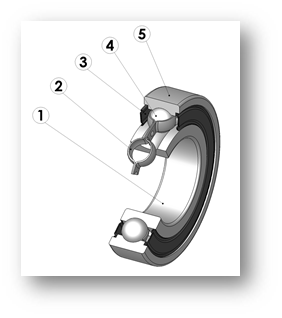

In [12]:
# Import
from scipy.io import loadmat
import os
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew, kurtosis
import glob

In [13]:
# Load single file

# Shape

# Plot it


In [14]:
# Get list of files

# Stack time series

# Get splits

# Calculate features for each split
    
    # Std
    
    # Skewness
    
    # Kurtosis

# Reshape

# Train test split

# Train SVM by GridSearchCV

# Get the best model and predict the test data set

# Get accuracy
